In [101]:
%load_ext autoreload
%autoreload 2

import numpy as np
from PIL import Image
import napari
import tifffile
from matplotlib import pyplot as plt

from segbox import SegBox
from vgg16_utils import get_vgg16_feature_space
from dino_utils import get_dinov2_feature_space

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
my_sb = SegBox()
my_sb.add_extractor("VGG16-small", get_vgg16_feature_space, {"layer_list":[0], "scalings":[1,2]})

In [103]:
print(my_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-small:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0], 'scalings': [1, 2]}
  Num PCs:     False
  Smoothening: False



In [104]:
my_sb.remove_extractor("VGG16-small")
print(my_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:



In [105]:
my_sb.add_extractor("VGG16-large", get_vgg16_feature_space, {"layer_list":[0,2], "scalings":[1,2,4,8]})
print(my_sb)
my_sb.add_extractor("VGG16-large", get_vgg16_feature_space, {"layer_list":[0,2,5], "scalings":[1,2,4,8]})

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2], 'scalings': [1, 2, 4, 8]}
  Num PCs:     False
  Smoothening: False



ValueError: Extractor already exists. Use overwrite=True to overwrite it.

In [106]:
my_sb.add_extractor("VGG16-large", get_vgg16_feature_space, {"layer_list":[0,2,5], "scalings":[1,2,4,8]}, overwrite=True)
print(my_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2, 5], 'scalings': [1, 2, 4, 8]}
  Num PCs:     False
  Smoothening: False



In [107]:
my_sb.add_extractor("DINOv2-s_r", get_dinov2_feature_space, {"dinov2_model":"s_r"})
print(my_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2, 5], 'scalings': [1, 2, 4, 8]}
  Num PCs:     False
  Smoothening: False
DINOv2-s_r:
  Function:    get_dinov2_feature_space
  Config:      {'dinov2_model': 's_r'}
  Num PCs:     False
  Smoothening: False



In [108]:
my_sb.set_extractor_options("VGG16-large", num_pcs=3, smoothening=4)
print(my_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2, 5], 'scalings': [1, 2, 4, 8]}
  Num PCs:     3
  Smoothening: 4
DINOv2-s_r:
  Function:    get_dinov2_feature_space
  Config:      {'dinov2_model': 's_r'}
  Num PCs:     False
  Smoothening: False



In [109]:
img = np.array(Image.open("../../data/shark_test_vid_frame0.png")) / 255
labels = tifffile.imread("../../data/shark_vid_labels_frame0.tif")

In [110]:
features = my_sb.extract_features_single_extractor(img, "VGG16-large")
features.shape

(480, 640, 3)

In [19]:
nap_v = napari.view_image(img)
nap_v.add_image(features)

<Image layer 'features' at 0x28229c21ee0>

In [111]:
all_features = my_sb.extract_features(img)
all_features.shape

(480, 640, 387)

In [22]:
nap_v = napari.view_image(img)
nap_v.add_image(np.moveaxis(all_features, -1,0))

<Image layer 'Image' at 0x2820f784f40>

In [112]:
my_sb.rf_train(img, labels, random_state=0)

In [113]:
pred = my_sb.rf_predict(img)

In [114]:
selfpred = my_sb.rf_selfpredict(img, labels, random_state=0)

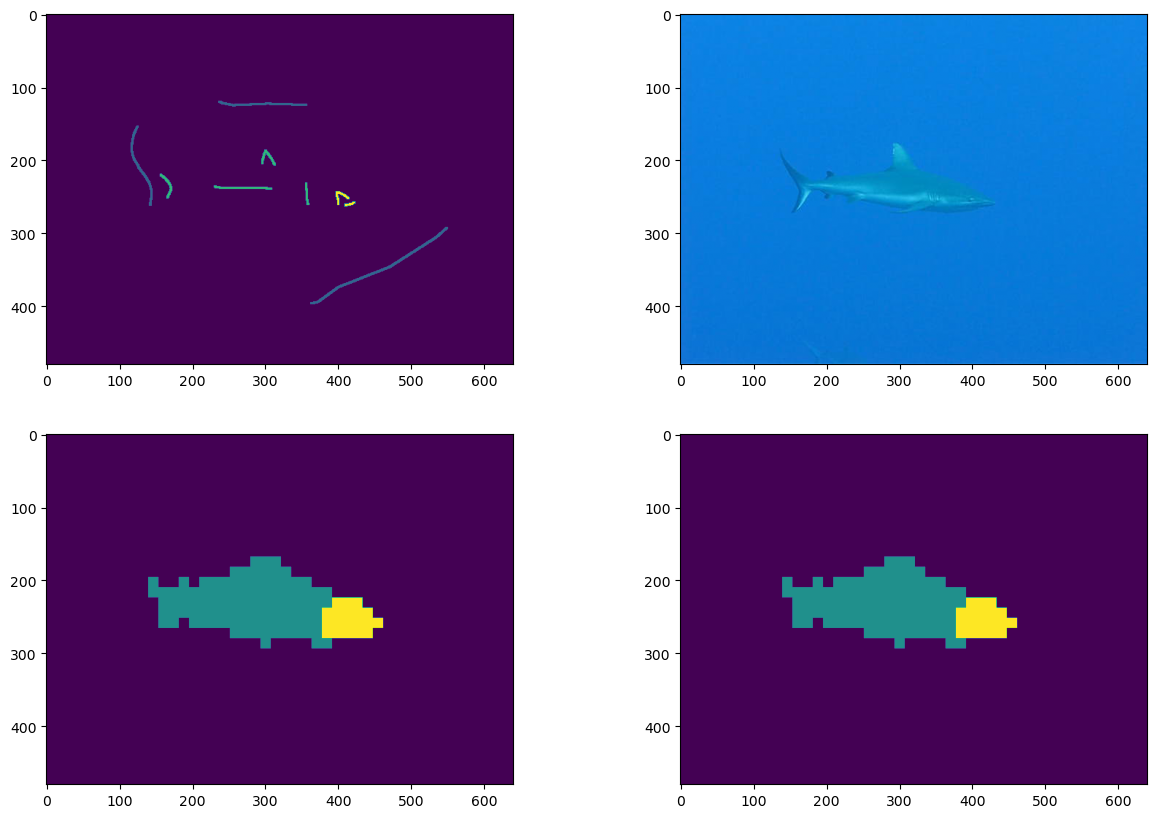

In [95]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].imshow(labels)
ax[0,1].imshow(img)
ax[1,0].imshow(pred)
ax[1,1].imshow(selfpred)

In [115]:
clusters = my_sb.get_kmeans(img, 3)

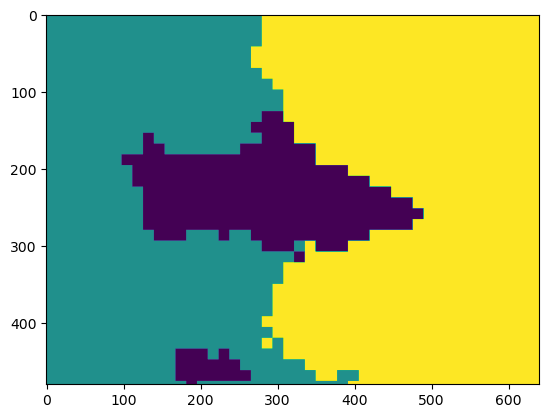

In [116]:
plt.imshow(clusters)

In [98]:
my_sb.add_extractor("UNI", get_dinov2_feature_space, {"dinov2_model":"uni"})
print(my_sb)

Added new feature extractor. Random Forest model has been reset.
Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2, 5], 'scalings': [1, 2, 4, 8]}
  Num PCs:     3
  Smoothening: 4
DINOv2-s_r:
  Function:    get_dinov2_feature_space
  Config:      {'dinov2_model': 's_r'}
  Num PCs:     False
  Smoothening: False
UNI:
  Function:    get_dinov2_feature_space
  Config:      {'dinov2_model': 'uni'}
  Num PCs:     False
  Smoothening: False



In [100]:
new_sb = SegBox()
vgg16_l = {"func": get_vgg16_feature_space, "cfg": {"layer_list":[0,2], "scalings":[1,2,4,8]}}
vgg16_s = {"func": get_vgg16_feature_space, "cfg": {"layer_list":[0], "scalings":[1,2]}}
dino_s_r = {"func": get_dinov2_feature_space, "cfg": {"dinov2_model":"s_r"}}
new_sb.add_extractors({"VGG16-large": vgg16_l, "VGG16-small": vgg16_s, "DINOv2-s_r": dino_s_r})
print(new_sb)

Segmentation Box
OPTIONS:
  pcs_as_features: False
  img_as_feature: False
  pred_smoothening: False
FEATURE EXTRACTORS:
VGG16-large:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0, 2], 'scalings': [1, 2, 4, 8]}
  Num PCs:     False
  Smoothening: False
VGG16-small:
  Function:    get_vgg16_feature_space
  Config:      {'layer_list': [0], 'scalings': [1, 2]}
  Num PCs:     False
  Smoothening: False
DINOv2-s_r:
  Function:    get_dinov2_feature_space
  Config:      {'dinov2_model': 's_r'}
  Num PCs:     False
  Smoothening: False

